<a href="https://colab.research.google.com/github/UttaraKet1607/Malarial-Cell-Image-Segmentation/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria

100% 673M/675M [00:19<00:00, 61.1MB/s]
100% 675M/675M [00:19<00:00, 36.3MB/s]


In [ ]:
! unzip cell-images-for-detecting-malaria.zip

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/cell_images"))

['Parasitized', 'cell_images', 'Uninfected']


In [8]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [9]:
parasitized_data = os.listdir('/content/cell_images/Parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C179P140ThinF_IMG_20151127_153350_cell_165.png', 'C146P107ThinF_IMG_20151018_134554_cell_253.png', 'C70P31_ThinF_IMG_20150819_141327_cell_79.png', 'C133P94ThinF_IMG_20151004_155144_cell_118.png', 'C51AP12thinF_IMG_20150724_161126_cell_118.png', 'C118P79ThinF_IMG_20151002_110609_cell_6.png', 'C174P135NThinF_IMG_20151127_135554_cell_186.png', 'C84P45ThinF_IMG_20150818_104849_cell_20.png', 'C174P135NThinF_IMG_20151127_135554_cell_197.png', 'C184P145ThinF_IMG_20151203_104334_cell_26.png']


['C121P82ThinF_IMG_20151002_132926_cell_63.png', 'C231ThinF_IMG_20151112_153359_cell_147.png', 'C241NThinF_IMG_20151207_124030_cell_98.png', 'C4thin_original_IMG_20150608_165908_cell_102.png', 'C67P28N_ThinF_IMG_20150819_115955_cell_13.png', 'C110P71ThinF_IMG_20150930_105925_cell_28.png', 'C107P68ThinF_IMG_20150924_221632_cell_42.png', 'C5NThinF_IMG_20150609_122108_cell_141.png', 'C82P43ThinF_IMG_20150817_123824_cell_4.png', 'C239ThinF_IMG_20151127_113150_cell_196.png']


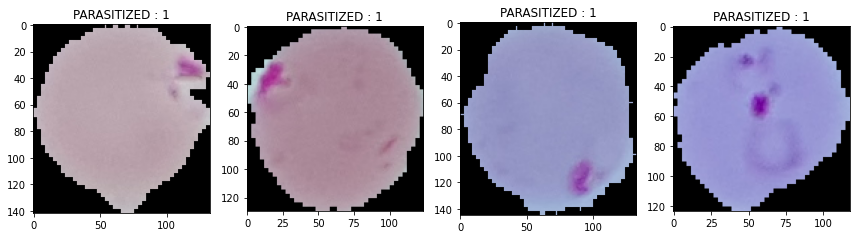

In [10]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

In [11]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

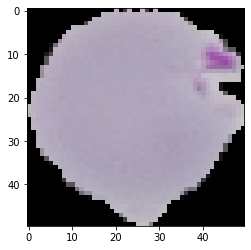

In [12]:
plt.imshow(data[0])
plt.show()

In [13]:
image_data = np.array(data)
labels = np.array(labels)

In [14]:
idx = np.arange(image_data.shape[0])
image_data = image_data[idx]
labels = labels[idx]

In [15]:
image_data.shape, labels.shape

((27558, 50, 50, 3), (27558,))

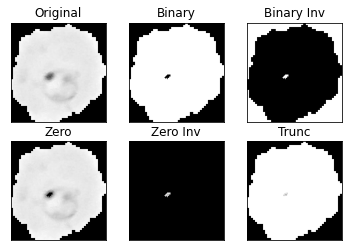

In [16]:
imgpath1 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
img = cv2.imread(imgpath1, 0)
th = 0
max_val = 255
    
ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
    
output = [img, o1, o2, o3, o4, o5]
    
titles = ['Original', 'Binary', 'Binary Inv',
              'Zero', 'Zero Inv', 'Trunc']
    
for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

plt.show()  

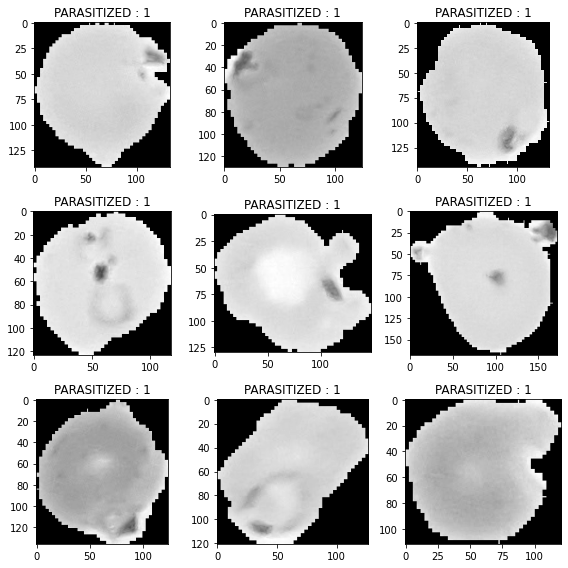

In [17]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    plt.imshow(img, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

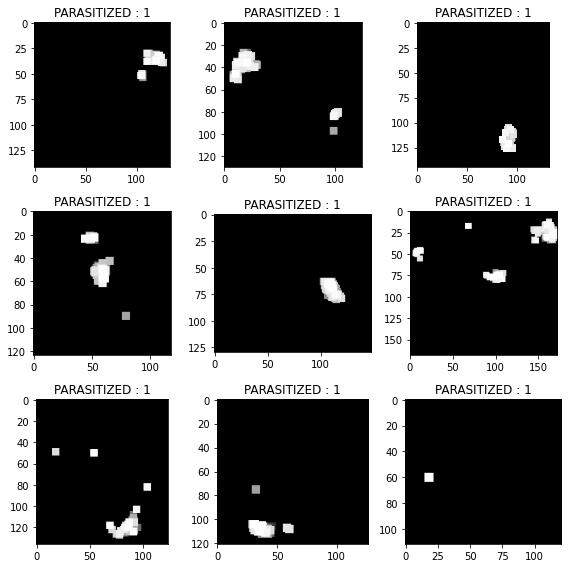

In [42]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(img, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=3)
    plt.imshow(sure_bg, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

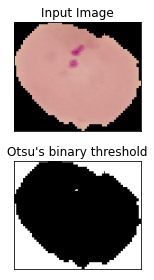

In [25]:
# SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

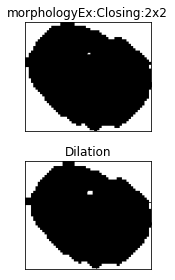

In [26]:
# SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(211),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_bg, 'gray')
plt.imsave(r'dilation.png',sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

https://www.analyticsvidhya.com/blog/2021/09/image-segmentation-algorithms-with-implementation-in-python/

https://www.askpython.com/python-modules/opencv-filter2d